In [11]:
import gensim.downloader as api

In [10]:
# api.info()  # Returns info about all available models
# api.info('word2vec-google-news-300')

In [12]:
wv = api.load('word2vec-google-news-300')

Here, word2vec is the algorithm, and google-news-300 is the dataset it's trained on

In [29]:
wv['great'].shape

(300,)

In [7]:
wv.similarity("great", "well")

0.4098271

In [ ]:
help(wv.similarity)

In [10]:
wv.similarity("cat", "feline")

0.73262346

In [12]:
wv.most_similar("good")

[('great', 0.7291510105133057),
 ('bad', 0.7190051078796387),
 ('terrific', 0.6889115571975708),
 ('decent', 0.6837348341941833),
 ('nice', 0.6836092472076416),
 ('excellent', 0.644292950630188),
 ('fantastic', 0.6407778263092041),
 ('better', 0.6120728850364685),
 ('solid', 0.5806035399436951),
 ('lousy', 0.5764201879501343)]

In [13]:
wv.most_similar("cat")

[('cats', 0.8099379539489746),
 ('dog', 0.760945737361908),
 ('kitten', 0.7464985251426697),
 ('feline', 0.7326233983039856),
 ('beagle', 0.7150582671165466),
 ('puppy', 0.7075453996658325),
 ('pup', 0.6934291124343872),
 ('pet', 0.6891531348228455),
 ('felines', 0.6755931973457336),
 ('chihuahua', 0.6709762215614319)]

In [14]:
wv.most_similar(positive=["france", "berlin"], negative=["paris"])

[('germany', 0.5094343423843384),
 ('european', 0.48650455474853516),
 ('german', 0.4714890420436859),
 ('austria', 0.46964022517204285),
 ('swedish', 0.4645182490348816),
 ('Wissenschaft', 0.45328807830810547),
 ('denmark', 0.4477355182170868),
 ('München', 0.4438532590866089),
 ('europe', 0.4420619308948517),
 ('belgium', 0.43769749999046326)]

In [15]:
wv.most_similar(positive=["king", "woman"], negative=["man"])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411403656006)]

In [17]:
wv.doesnt_match(['dog', 'cat', 'apple', 'bird'])

'apple'

In [18]:
glv = api.load('glove-twitter-25')

[==================================================] 100.0% 104.8/104.8MB downloaded


In [19]:
glv.most_similar("good")

[('too', 0.9648017287254333),
 ('day', 0.9533665180206299),
 ('well', 0.9503170847892761),
 ('nice', 0.9438973665237427),
 ('better', 0.9425962567329407),
 ('fun', 0.941892683506012),
 ('much', 0.9413353800773621),
 ('this', 0.9387555122375488),
 ('hope', 0.9383508563041687),
 ('great', 0.9378516674041748)]

In [20]:
glv.doesnt_match(['dog', 'cat', 'apple', 'bird'])

'apple'

In [21]:
glv.most_similar(positive=["king", "woman"], negative=["man"])

[('meets', 0.8841923475265503),
 ('prince', 0.832163393497467),
 ('queen', 0.8257461190223694),
 ('’s', 0.817409873008728),
 ('crow', 0.813499391078949),
 ('hunter', 0.8131037950515747),
 ('father', 0.8115834593772888),
 ('soldier', 0.81113600730896),
 ('mercy', 0.8082393407821655),
 ('hero', 0.8082263469696045)]

### Text Classificcation using Gensim Word Vectors

In [14]:
!wget -O Fake_Real_Data.csv https://raw.githubusercontent.com/codebasics/nlp-tutorials/main/14_word_vectors_spacy_text_classification/Fake_Real_Data.csv

--2025-01-16 22:56:55--  https://raw.githubusercontent.com/codebasics/nlp-tutorials/main/14_word_vectors_spacy_text_classification/Fake_Real_Data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25876225 (25M) [text/plain]
Saving to: ‘Fake_Real_Data.csv’

Fake_Real_Data.csv  100%[===================>]  24.68M  --.-KB/s    in 0.1s    

2025-01-16 22:56:56 (202 MB/s) - ‘Fake_Real_Data.csv’ saved [25876225/25876225]



In [15]:
import pandas as pd

df = pd.read_csv('/kaggle/working/Fake_Real_Data.csv')
df

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real
...,...,...
9895,Wikileaks Admits To Screwing Up IMMENSELY Wit...,Fake
9896,Trump consults Republican senators on Fed chie...,Real
9897,Trump lawyers say judge lacks jurisdiction for...,Real
9898,WATCH: Right-Wing Pastor Falsely Credits Trum...,Fake


In [16]:
df['label'].value_counts()

label
Fake    5000
Real    4900
Name: count, dtype: int64

In [17]:
df['fake'] = df['label'].map({'Fake' : 1, 'Real' : 0})
df.iloc[0]

Text      Top Trump Surrogate BRUTALLY Stabs Him In The...
label                                                 Fake
fake                                                     1
Name: 0, dtype: object

In [18]:
# import gensim.downloader as api
# wv = api.load('word2vec-google-news-300')

In [ ]:
!python -m spacy download en_core_web_lg

In [20]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [21]:
def preprocess(text):
    doc = nlp(text)
    return [token.lemma_ for token in doc
                    if not (token.is_stop or token.is_punct)]

In [22]:
preprocess("don't worry if you don't understand")

['worry', 'understand']

In [23]:
def preprocess_and_vectorize(text):
    return wv.get_mean_vector(preprocess(text))

In [ ]:
preprocess_and_vectorize("don't worry if you don't understand")

In [29]:
v1 = wv['worry']
v2 = wv['understand']

import numpy as np
mean_vec = np.mean([v1, v2], axis=0)[:3]

mean_vec

array([ 0.00976562, -0.00561523, -0.08905029], dtype=float32)

In [30]:
# Don't set this to False
wv.get_mean_vector(['worry', 'understand'], pre_normalize=False)[:3]

array([ 0.00976562, -0.00561523, -0.08905029], dtype=float32)

In [31]:
from tqdm import tqdm
tqdm.pandas()

In [32]:
df['vector'] = df['Text'].progress_apply(lambda x: preprocess_and_vectorize(x))

100%|██████████| 9900/9900 [14:32<00:00, 11.34it/s]


In [33]:
df.to_csv('Fake_Real_Data_Processed.csv', index=False)

In [34]:
df

,Text,label,fake,vector
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,1,"[0.008657642, 0.019024342, -0.011917442, 0.032..."
1,U.S. conservative leader optimistic of common ...,Real,0,"[0.010864096, 0.007960429, 0.0011915653, 0.014..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,0,"[0.018134918, 0.0062743523, -0.005872244, 0.03..."
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,1,"[0.01255197, 0.012613623, 5.9780963e-05, 0.021..."
4,Democrats say Trump agrees to work on immigrat...,Real,0,"[-0.0019059887, 0.011889367, 0.0035395357, 0.0..."
...,...,...,...,...
9895,Wikileaks Admits To Screwing Up IMMENSELY Wit...,Fake,1,"[0.009046372, 0.015129782, -0.00394294, 0.0316..."
9896,Trump consults Republican senators on Fed chie...,Real,0,"[0.010050427, 0.0036850946, -0.003151232, 0.02..."
9897,Trump lawyers say judge lacks jurisdiction for...,Real,0,"[0.0032499663, 0.004776459, 0.010537294, -0.00..."
9898,WATCH: Right-Wing Pastor Falsely Credits Trum...,Fake,1,"[0.0055283327, 0.014677874, 0.00027507733, 0.0..."


In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['vector'].values,
    df['fake'],
    test_size = 0.2,
    random_state = 1,
    stratify = df['fake']
)

In [37]:
X_train.shape

(7920,)

In [38]:
X_train = np.stack(X_train)
X_test = np.stack(X_test)

In [39]:
X_train.shape

(7920, 300)

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

clf = GradientBoostingClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.98      0.98      0.98      1000

    accuracy                           0.98      1980
   macro avg       0.98      0.98      0.98      1980
weighted avg       0.98      0.98      0.98      1980



In [41]:
test_news = [
    "Michigan governor denies misleading U.S. House on Flint water (Reuters) - Michigan Governor Rick Snyder denied Thursday that he had misled a U.S. House of Representatives committee last year over testimony on Flintâ€™s water crisis after lawmakers asked if his testimony had been contradicted by a witness in a court hearing. The House Oversight and Government Reform Committee wrote Snyder earlier Thursday asking him about published reports that one of his aides, Harvey Hollins, testified in a court hearing last week in Michigan that he had notified Snyder of an outbreak of Legionnairesâ€™ disease linked to the Flint water crisis in December 2015, rather than 2016 as Snyder had testified. â€œMy testimony was truthful and I stand by it,â€ Snyder told the committee in a letter, adding that his office has provided tens of thousands of pages of records to the committee and would continue to cooperate fully.  Last week, prosecutors in Michigan said Dr. Eden Wells, the stateâ€™s chief medical executive who already faced lesser charges, would become the sixth current or former official to face involuntary manslaughter charges in connection with the crisis. The charges stem from more than 80 cases of Legionnairesâ€™ disease and at least 12 deaths that were believed to be linked to the water in Flint after the city switched its source from Lake Huron to the Flint River in April 2014. Wells was among six current and former Michigan and Flint officials charged in June. The other five, including Michigan Health and Human Services Director Nick Lyon, were charged at the time with involuntary manslaughter",
    " WATCH: Fox News Host Loses Her Sh*t, Says Investigating Russia For Hacking Our Election Is Unpatriotic This woman is insane.In an incredibly disrespectful rant against President Obama and anyone else who supports investigating Russian interference in our election, Fox News host Jeanine Pirro said that anybody who is against Donald Trump is anti-American. Look, it s time to take sides,  she began.",
    " Sarah Palin Celebrates After White Man Who Pulled Gun On Black Protesters Goes Unpunished (VIDEO) Sarah Palin, one of the nigh-innumerable  deplorables  in Donald Trump s  basket,  almost outdid herself in terms of horribleness on Friday."
]

test_news_vectors = [preprocess_and_vectorize(n) for n in test_news]
clf.predict(test_news_vectors)

array([0, 1, 1])

Text(95.72222222222221, 0.5, 'Truth')

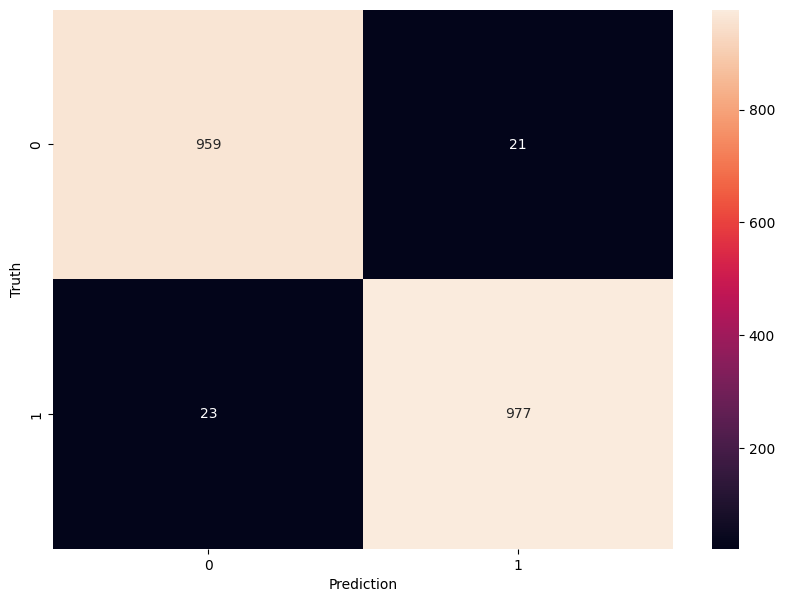

In [42]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sn

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')